In [1]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import LabelEncoder

In [2]:
# 1. Paths
data_dir = Path(r"C:\Users\Raghav Singla\Desktop\PBL-4")
train_fp = data_dir / "UNSW_NB15_training-set.csv"
test_fp  = data_dir / "UNSW_NB15_testing-set.csv"

In [3]:
# 2. Load
df_train = pd.read_csv(train_fp)
df_test  = pd.read_csv(test_fp)

In [4]:
drop_cols = ["id", "attack_cat"]
X_train = df_train.drop(columns=drop_cols + ["label"])
y_train = df_train["label"]
X_test  = df_test.drop(columns=drop_cols + ["label"])
y_test  = df_test["label"]


In [5]:
# 4. Label‚Äêencode categoricals
cat_cols = ["proto", "service", "state"]
for col in cat_cols:
    le = LabelEncoder()
    combined = pd.concat([X_train[col], X_test[col]]).astype(str)
    le.fit(combined)
    X_train[col] = le.transform(X_train[col].astype(str))
    X_test[col]  = le.transform(X_test[col].astype(str))

In [6]:
# 5. Numeric coercion + missing‚Äêvalue imputation
X_train = X_train.apply(pd.to_numeric, errors="coerce")
X_test  = X_test.apply(pd.to_numeric, errors="coerce")
medians = X_train.median()
X_train.fillna(medians, inplace=True)
X_test.fillna(medians, inplace=True)


In [7]:
# 6. Display dataset info
print("=== TRAIN SET INFO ===")
print(X_train.shape)
print(X_train.info())
print("\n=== TEST SET INFO ===")
print(X_test.shape)
print(X_test.info())
print("\n=== LABEL DISTRIBUTIONS ===")
print("Train:", y_train.value_counts(normalize=True).round(3).to_dict())
print("Test: ", y_test.value_counts(normalize=True).round(3).to_dict())

=== TRAIN SET INFO ===
(175341, 42)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 42 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                175341 non-null  float64
 1   proto              175341 non-null  int32  
 2   service            175341 non-null  int32  
 3   state              175341 non-null  int32  
 4   spkts              175341 non-null  int64  
 5   dpkts              175341 non-null  int64  
 6   sbytes             175341 non-null  int64  
 7   dbytes             175341 non-null  int64  
 8   rate               175341 non-null  float64
 9   sttl               175341 non-null  int64  
 10  dttl               175341 non-null  int64  
 11  sload              175341 non-null  float64
 12  dload              175341 non-null  float64
 13  sloss              175341 non-null  int64  
 14  dloss              175341 non-null  int64  
 15  sinpkt         

In [8]:
results = []  # Shared results list for comparison later


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

results.append({
    "Model": "RandomForest",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1-Score": f1_score(y_test, y_pred_rf),
    "ROC AUC": roc_auc_score(y_test, y_prob_rf),
})

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))


Random Forest
Accuracy: 0.8731720351746587
Precision: 0.8190030355118312
Recall: 0.9879996470484426
F1-Score: 0.8955987922174008
ROC AUC: 0.978779018937759


In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:, 1]

results.append({
    "Model": "KNN",
    "Accuracy": accuracy_score(y_test, y_pred_knn),
    "Precision": precision_score(y_test, y_pred_knn),
    "Recall": recall_score(y_test, y_pred_knn),
    "F1-Score": f1_score(y_test, y_pred_knn),
    "ROC AUC": roc_auc_score(y_test, y_prob_knn),
})

print("K-Nearest Neighbors")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1-Score:", f1_score(y_test, y_pred_knn))
print("ROC AUC:", roc_auc_score(y_test, y_prob_knn))


K-Nearest Neighbors
Accuracy: 0.7877253072924257
Precision: 0.7418262636084246
Recall: 0.9424688961440042
F1-Score: 0.8301967452028176
ROC AUC: 0.8656244771308854


In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

results.append({
    "Model": "LogisticRegression",
    "Accuracy": accuracy_score(y_test, y_pred_lr),
    "Precision": precision_score(y_test, y_pred_lr),
    "Recall": recall_score(y_test, y_pred_lr),
    "F1-Score": f1_score(y_test, y_pred_lr),
    "ROC AUC": roc_auc_score(y_test, y_prob_lr),
})

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-Score:", f1_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))


Logistic Regression
Accuracy: 0.7145824223874071
Precision: 0.6806500190305979
Recall: 0.9073281567104915
F1-Score: 0.7778103459687408
ROC AUC: 0.8012295613026774


In [23]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
y_prob_ada = ada.predict_proba(X_test)[:, 1]

results.append({
    "Model": "AdaBoost",
    "Accuracy": accuracy_score(y_test, y_pred_ada),
    "Precision": precision_score(y_test, y_pred_ada),
    "Recall": recall_score(y_test, y_pred_ada),
    "F1-Score": f1_score(y_test, y_pred_ada),
    "ROC AUC": roc_auc_score(y_test, y_prob_ada),
})

print("AdaBoost")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Precision:", precision_score(y_test, y_pred_ada))
print("Recall:", recall_score(y_test, y_pred_ada))
print("F1-Score:", f1_score(y_test, y_pred_ada))
print("ROC AUC:", roc_auc_score(y_test, y_prob_ada))


AdaBoost
Accuracy: 0.8607467327406112
Precision: 0.8105297903944545
Recall: 0.9750066178417012
F1-Score: 0.885192714018205
ROC AUC: 0.9768129791973215


=== MODEL PERFORMANCE COMPARISON ===


Accuracy  Precision  Recall  F1-Score  ROC AUC
Model                                                             
RandomForest          0.8732     0.8190  0.9880    0.8956   0.9788
KNN                   0.7877     0.7418  0.9425    0.8302   0.8656
LogisticRegression    0.7146     0.6807  0.9073    0.7778   0.8012
AdaBoost              0.8607     0.8105  0.9750    0.8852   0.9768
LogisticRegression    0.7146     0.6807  0.9073    0.7778   0.8012
AdaBoost              0.8607     0.8105  0.9750    0.8852   0.9768

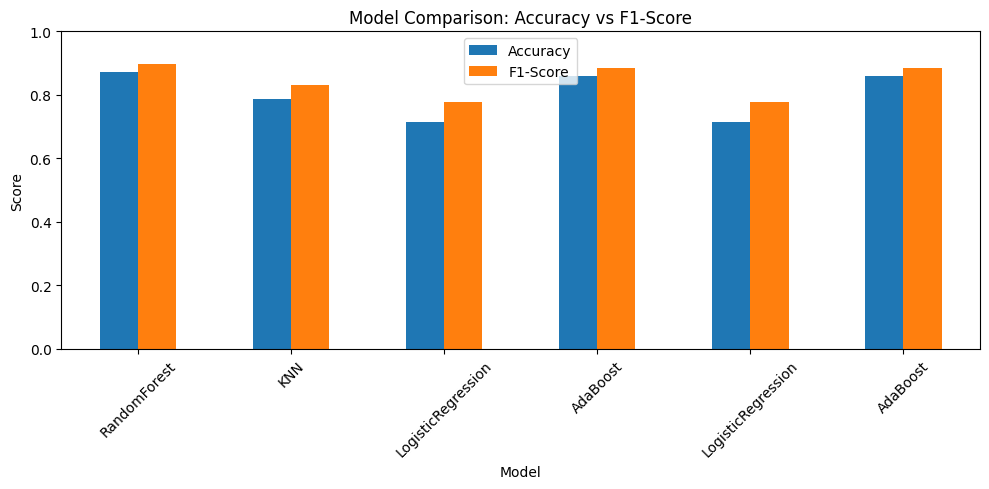

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Create and display comparison table
metrics_df = pd.DataFrame(results).set_index("Model").round(4)
print("=== MODEL PERFORMANCE COMPARISON ===")
display(metrics_df)

# Plot Accuracy vs F1-Score
metrics_df[["Accuracy", "F1-Score"]].plot(kind="bar", ylim=(0, 1), rot=45, figsize=(10, 5))
plt.title("Model Comparison: Accuracy vs F1-Score")
plt.ylabel("Score")
plt.tight_layout()
plt.show()


## PCA

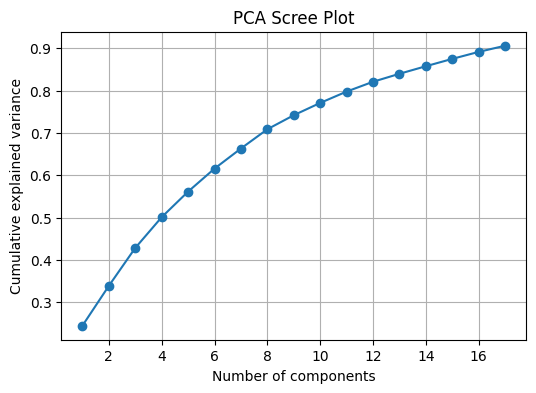

Number of components to reach 90% variance: 17


In [25]:
# === My new cell ===
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# 1. Standardize the training features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# 2. Fit PCA retaining enough components to explain ~90% variance
pca = PCA(n_components=0.90, svd_solver="full", random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 3. Scree plot of explained variance ratio
plt.figure(figsize=(6,4))
plt.plot(
    range(1, len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_.cumsum(),
    marker="o"
)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA Scree Plot")
plt.grid(True)
plt.show()

print(f"Number of components to reach 90% variance: {pca.n_components_}")



In [26]:
# === My new cell ===
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Standardize and fit PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
pca = PCA(random_state=42)
pca.fit(X_scaled)

# 2. Collect explained variances
pc_names = [f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))]
var_ratios = pca.explained_variance_ratio_

# 3. Compute loadings and find top feature per PC
loadings = pd.DataFrame(
    pca.components_, columns=X_train.columns, index=pc_names
)
top_features = loadings.abs().idxmax(axis=1)

# 4. Build summary DataFrame and sort by variance
summary = pd.DataFrame({
    "Component": pc_names,
    "Explained Variance": var_ratios,
    "Top Feature": top_features
})
summary = summary.sort_values("Explained Variance", ascending=False).reset_index(drop=True)

# 5. Display
print(summary)


   Component  Explained Variance        Top Feature
0        PC1        2.445230e-01               dwin
1        PC2        9.413791e-02              dpkts
2        PC3        8.959863e-02              dpkts
3        PC4        7.263860e-02             sbytes
4        PC5        6.044675e-02             dbytes
5        PC6        5.431044e-02             sinpkt
6        PC7        4.746665e-02       is_ftp_login
7        PC8        4.549553e-02               sjit
8        PC9        3.316248e-02            service
9       PC10        2.903784e-02              sload
10      PC11        2.679803e-02                dur
11      PC12        2.317811e-02              smean
12      PC13        1.886043e-02        trans_depth
13      PC14        1.786965e-02               djit
14      PC15        1.734123e-02                dur
15      PC16        1.653141e-02  response_body_len
16      PC17        1.452947e-02            service
17      PC18        1.334002e-02                dur
18      PC19

In [27]:
# === My new cell ===
# Path 2: PCA-based feature selection (fixing the X_train_s undefined error)

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1) Standardize the features first
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
# (Optionally standardize X_test if you‚Äôll use it later)
# X_test_s = scaler.transform(X_test)

# 2a) Fit full PCA to get loadings & explained variances
pca_full = PCA(random_state=42)
pca_full.fit(X_train_s)
loadings = pca_full.components_           # shape (n_components, n_features)
vars_rat  = pca_full.explained_variance_ratio_

# 2b) Compute PCA-importance per feature
#     score_i = sum_k (vars_rat[k] * loading[k, i]^2)
scores = np.sum((loadings**2).T * vars_rat, axis=1)
score_s  = pd.Series(scores, index=X_train.columns).sort_values(ascending=False)

# 2c) Select top-10 features
top_feats = score_s.head(10).index.tolist()
print("Top 10 PCA-selected features:", top_feats)

# 2d) Retrain & evaluate a RandomForest on those features
X_tr_sel = X_train[top_feats]
X_te_sel = X_test[top_feats]

rf_sel = RandomForestClassifier(
    n_estimators=100, class_weight="balanced", random_state=42, n_jobs=-1
)
rf_sel.fit(X_tr_sel, y_train)
y_pred2 = rf_sel.predict(X_te_sel)

print("\nClassification Report on PCA-selected features:")
print(classification_report(y_test, y_pred2, digits=4))


Top 10 PCA-selected features: ['proto', 'dur', 'state', 'smean', 'sttl', 'dpkts', 'ackdat', 'synack', 'response_body_len', 'djit']

Classification Report on PCA-selected features:
              precision    recall  f1-score   support

           0     0.9548    0.7413    0.8346     37000
           1     0.8215    0.9714    0.8901     45332

    accuracy                         0.8680     82332
   macro avg     0.8881    0.8563    0.8624     82332
weighted avg     0.8814    0.8680    0.8652     82332



In [28]:
# === My new cell ===
# 7. Hyperparameter tuning on PCA‚Äêselected features
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf_base = RandomForestClassifier(class_weight="balanced", random_state=42)
rand_search = RandomizedSearchCV(
    rf_base,
    param_distributions=param_dist,
    n_iter=20,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)
rand_search.fit(X_tr_sel, y_train)

print("üîç Best hyperparameters:", rand_search.best_params_)
best_rf = rand_search.best_estimator_


Fitting 5 folds for each of 20 candidates, totalling 100 fits
üîç Best hyperparameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}


=== Final Tuned RF Performance (via pipeline) ===
              precision    recall  f1-score   support

           0     0.9536    0.7437    0.8357     37000
           1     0.8227    0.9705    0.8905     45332

    accuracy                         0.8686     82332
   macro avg     0.8882    0.8571    0.8631     82332
weighted avg     0.8815    0.8686    0.8659     82332



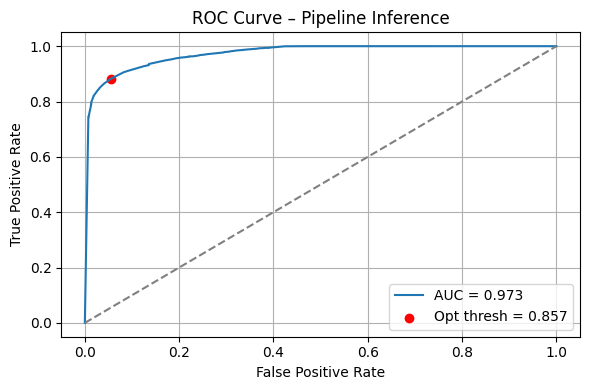

‚úî Saved pipeline and threshold (0.857)


In [35]:
# === My new cell ===
# 8. Build & fit pipeline ‚Üí final evaluation via pipeline ‚Üí ROC & optimal threshold ‚Üí persist

import numpy as np
import json
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# PCA‚Äêselected features
top_feats = [
    'proto','dur','state','smean','sttl',
    'dpkts','ackdat','synack','response_body_len','djit'
]

# 1) Build & fit the pipeline on training data
selector = ColumnTransformer(
    [("select", "passthrough", top_feats)],
    remainder="drop"
)
pipeline = Pipeline([
    ("select", selector),
    ("rf", best_rf)
])
pipeline.fit(X_train[top_feats], y_train)

# 2) Evaluate using the pipeline (avoids feature‚Äêname warnings)
y_pred = pipeline.predict(X_test[top_feats])
y_prob = pipeline.predict_proba(X_test[top_feats])[:, 1]

print("=== Final Tuned RF Performance (via pipeline) ===")
print(classification_report(y_test, y_pred, digits=4))

# 3) Compute ROC curve & optimal threshold (max TPR‚àíFPR)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
opt_idx    = np.argmax(tpr - fpr)
opt_thresh = thresholds[opt_idx]
roc_auc_val = auc(fpr, tpr)

# 4) Plot ROC with optimal threshold point
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_val:.3f}")
plt.plot([0,1], [0,1], "--", color="gray")
plt.scatter(fpr[opt_idx], tpr[opt_idx], color="red",
            label=f"Opt thresh = {opt_thresh:.3f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve ‚Äì Pipeline Inference")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# 5) Persist the fitted pipeline and threshold
joblib.dump(pipeline, "ids_pipeline_final_080520251530.pkl")
with open("threshold.json","w") as f:
    json.dump({"threshold": float(opt_thresh)}, f)
print(f"‚úî Saved pipeline and threshold ({opt_thresh:.3f})")


Feature importances (pipeline RF):
sttl                 0.290582
smean                0.139357
dur                  0.122257
synack               0.105375
dpkts                0.098694
ackdat               0.093141
state                0.071267
djit                 0.053521
proto                0.015184
response_body_len    0.010622
dtype: float64


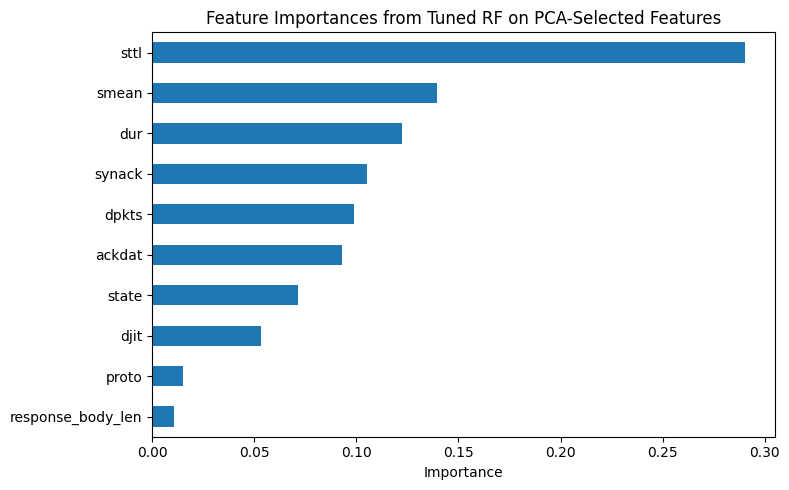

In [36]:
# === My new cell ===
# 10. Single‚Äêfigure feature importance plot

import pandas as pd
import matplotlib.pyplot as plt

# Your 10 features
top_feats = [
    'proto','dur','state','smean','sttl',
    'dpkts','ackdat','synack','response_body_len','djit'
]

# Grab the RF from the pipeline
rf_in_pipeline = pipeline.named_steps['rf']

# Build a Series of importances
importances = pd.Series(
    rf_in_pipeline.feature_importances_,
    index=top_feats
).sort_values(ascending=False)

print("Feature importances (pipeline RF):")
print(importances)

# Create one figure & axis
fig, ax = plt.subplots(figsize=(8,5))

# Plot into that axis
importances.plot.barh(ax=ax)

# Tweak it
ax.invert_yaxis()
ax.set_title("Feature Importances from Tuned RF on PCA-Selected Features")
ax.set_xlabel("Importance")

# Finally, show just once
plt.tight_layout()
plt.show()
